### Just some initial code...

In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# --------Top of def main():--------
# ----Create initial data frames----
hr_df = pd.read_csv('HR_comma_sep.csv')
hr_df.rename(
    columns={
        'sales': 'department',
        'average_montly_hours': 'average_monthly_hours',
        'Work_accident': 'work_accident'},
    inplace=True)
# print(hr_df.groupby('department').count().index)
department_conversion = {
    'IT': 0, 'RandD': 1, 'accounting': 2, 'hr': 3,
    'management': 4, 'marketing': 5, 'product_mng': 6,
    'sales': 7, 'support': 8, 'technical': 9}
hr_df['department_number'] = hr_df['department'].apply(lambda x: department_conversion[x])
salary_conversion = {'low': 0, 'medium': 1, 'high': 2}
hr_df['salary_number'] = hr_df['salary'].apply(lambda x: salary_conversion[x])
left_df = hr_df[hr_df['left']==1]
stay_df = hr_df[hr_df['left']==0]
    

# ----Re-used Helper Functions----
def histogram_set(df, x_cols, y_sum_col, show=True):
    """Return None
    
    This function plots a matrix of histogram with a histogram chart for each
    column in x_cols, where each bar chart has bins for values in x_cols and
    bars with height equal to the number of elements in that bin.
    """
    width = min([len(x_cols), 3])
    height = math.ceil(len(x_cols) / 3)
    
    plt.figure(figsize=(13, 5))
    
    for i, x in enumerate(x_cols):
        if x:  # We can put place markers so that we can add data later
            plt.subplot(height, width, i+1)
            #sum_df = pd.DataFrame(df.groupby(x).sum()[y_sum_col])
            #plt.bar(list(sum_df.index), list(sum_df[y_sum_col]))
            plt.hist(df[x])
            plt.title('Total {} by {}'.format(y_sum_col, x))
            plt.xlabel(x)
            plt.ylabel('Total of {}'.format(y_sum_col))
    plt.tight_layout()
    
    if show:
        plt.show()
    
    
def plot_set_vs_set(df, x_cols, y_cols, legend_label=None, marker_size=2.0):
    """Return None
    
    This function plots a matrix of scatter plots with all combinations of
        the columns of df listed in x_cols, on the x-axis
    versus
        the columns of df listed in y_cols, on the y-axis
    There will be a row of scatter plots for each column listed in y_cols
    There will be a column of scatter plots for each column listed in x_cols
    """
    width = len(x_cols)
    height = len(y_cols)
    
    plt.figure(figsize=(13, 7))
    
    for i, y in enumerate(y_cols):
        for j, x in enumerate(x_cols):
            if x != y:
                plt.subplot(height, width, (i*width)+(j+1))
                plt.plot(
                    df[x], df[y], '*', markersize=marker_size,
                    label=legend_label, alpha=0.2)
                plt.title('{}\nvs. {}'.format(x, y))
                plt.xlabel(x)
                plt.ylabel(y)
                if legend_label and i==0 and j==0:
                    plt.legend(bbox_to_anchor=(0.13, -0.12))
    plt.tight_layout()
    plt.show()
    

# ----One Time Helper Functions----
def data_vis1(hr_df, left_df):
    labels = ('Left', 'Staying')
    count_left = len(left_df)
    count_stay = len(hr_df) - count_left
    sizes = [count_left, count_stay]
    colors = ['gold', 'yellowgreen']
    explode = (0.1, 0)  # explode 1st slice
     
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 3, 1)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title('Percent of Employees That Left')
    
    # Distribution leavers' time spent at company
    plt.subplot(1, 3, 2)
    plt.hist(left_df['time_spend_company'])
    time_average = np.mean(left_df['time_spend_company'])
    plt.axvline(x=time_average, label='Average', color='red')
    plt.title('Distribution of Years Spent\n At Company Before Leaving')
    plt.xlabel('Years Spent At Company')
    plt.ylabel('Total That Left')
    plt.legend()
    
    # Distribution leavers' time spent at company
    plt.subplot(1, 3, 3)
    plt.hist(hr_df['time_spend_company'])
    time_average = np.mean(hr_df['time_spend_company'])
    plt.axvline(x=time_average, label='Average', color='red')
    plt.title('Distribution of Years\nSpent At Company')
    plt.xlabel('Years Spent At Company')
    plt.ylabel('Total Employees')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    
def data_vis2(hr_df, left_df):
    # Plot quality employees that left
    histogram_set(
        left_df,
        ['last_evaluation', 'promotion_last_5years', 'salary_number'],
        'Employees That Left', show=False)
    
    # Set labels afterwards
    plt.subplot(1, 3, 1)
    plt.xlim(.36, 1.0)
    plt.subplot(1, 3, 2)
    plt.xticks(range(2), ('No', 'Yes'))
    plt.xlabel('Promotion in the Last 5 Years')
    plt.subplot(1, 3, 3)
    plt.xticks(range(3), ('Low', 'Medium', 'High'))
    plt.xlabel('Salary')
    
    plt.show()
    
    # Plot all quality employees
    histogram_set(
        hr_df,
        ['last_evaluation', 'promotion_last_5years', 'salary_number'],
        'All Employees', show=False)
    
    # Set labels afterwards
    plt.subplot(1, 3, 1)
    evaluation_average = np.mean(hr_df['last_evaluation'])
    plt.axvline(x=evaluation_average, label='Average', color='red')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.xticks(range(2), ('No', 'Yes'))
    plt.xlabel('Promotion in the Last 5 Years')
    plt.subplot(1, 3, 3)
    plt.xticks(range(3), ('Low', 'Medium', 'High'))
    plt.xlabel('Salary')
    
    plt.show()
    

def data_vis3(stay_df, left_df):
    x = [
        'number_project', 'average_monthly_hours',
        'time_spend_company', 'last_evaluation']
    y = ['satisfaction_level', 'last_evaluation']
    plot_set_vs_set(left_df, x, y, 'Left')
    
    x = [
        'number_project', 'average_monthly_hours',
        'time_spend_company', 'last_evaluation']
    y = ['satisfaction_level', 'last_evaluation']
    plot_set_vs_set(stay_df, x, y, 'Stay')
    #histogram_set(left_df, ['satisfaction_level'], 'Employees That Left')
    

## Assignment Specification
#### 1) Describe your data set. Describe and explore your data set in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the data set that you will use.

#### 2) Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

####     ... What variables does your data contain and what distributions do you think they have? Does the data bear on the preliminary questions you wrote down? What new questions might you answer? How does the data look when you plot it out?

#### 3) Propose further research. Lastly, make a proposal for a realistic future research project on this data set that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

# Prep Course: Capstone Project
#### Human Resources is the team responsible for acquiring and maintaining the employees at a company. A large part of this task is employee retention, preventing employees from leaving prematurely.

## Why is the talent leaving?
This data set came from Kaggle (https://www.kaggle.com/ludobenistant/hr-analytics) and is fictional and simulated. The data is meant to be analysed to find the factors affecting whether or not an employee leaves the company.<br>
<br>
The description connected to the data set on Kaggle hints at relevant aspects of the data to consider. In the description of the data, "Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next."  Two characteristics are suggested to be of interest and potentially interrelated: data determining if an employee  is likely to leave the company (primary concern) and data determining if an employee is the best and most experienced (secondary concern). There is also a minor characteristic of how to determine whether or not an employee leaving is considered premature.<br>
<br>
The length of time that this data was recorded over was not given, which is perhaps a valuable missing piece of information. 

## Know what is "best"
Let us concretely define measurements for terms used, such as "best":<br>
<strong>Best employees</strong>: employees with higher (say the top 25% of) scores on their last evaluation<br>
  <i>Other considerations:</i>
  * Promotion in last 5 years
  * High salary<br>

<strong>Experienced employees</strong>: (say the top 25%) employees that spent the longest time working at the company<br>
  <i>Other considerations:</i>
  * Most monthly hours
  * Most projects<br>
  
<strong>Prematurely left</strong>: any employee was labeled as having left (will assume they were not labeled as such if they werer not leaving prematurely)<br>
#### Having resolved some abiguity, let's approach our problem.

## Validate the question
### Are many employees leaving or not?
For the pie chart (below) on the left, with almost 25% of employees having left in this dataset, there is a significant amount of employees that left, and the relative number is not insignificant. We cannot determine the rate that employees are leaving without the timeframe of the study, but we can see that ever one of four hires leaves.<br>
<br>
Obviously, this piece of information is not indicative by itself, for these employees could have left all at once (very alarming) or been replacements for a single position one after another (less significant and could just be the nature of a single position).<br>
<br>
For the histogram on the right, can see that about half of employees with about 3 years at the company leave, with the other half with 4 or more years at the company. Very few employees with less than 3 years experience leave. With an average of almost 4 years spent at the company for employees who leave, this is a pretty high number. This would support the assertion that generally experienced employees are leaving the company, although the greatest concentration is not with the "most experienced" employees 5-6 years.<br>
<br>
Depending on the timeframe of this study, the problem may not be that severe, although present. The years spent at the company is about 3.5 and while that of the employees that left is 3.8, but this does indicate an extreme skew to the most experienced employees.

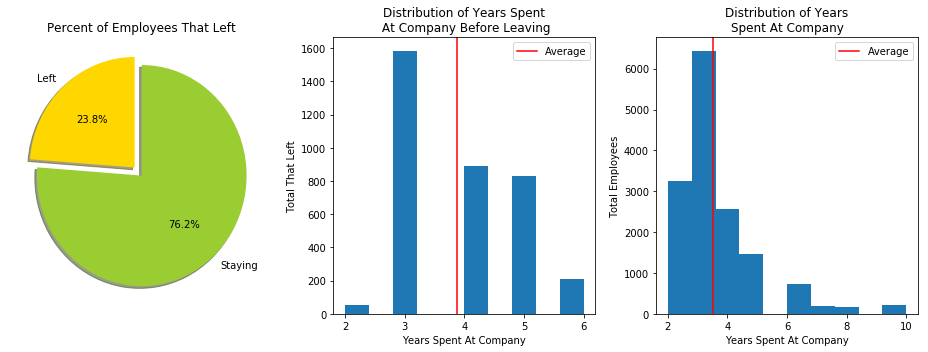

In [135]:
# Percentage that left vs. stayed
data_vis1(hr_df, left_df)


## Who is leaving?
### Were the employees that left the best and most experienced ones?
Based on our measure of an employee's quality by their last evaluation score, we can see that those leaving are in two groupings: lower evaluated employees and higher evaluated employees. Low evaluated employees(with scores of 0.6 or less) have a little less than half of the employees that left and higher evaluated employees (with scores of 0.8 or more) with a little more than half of the employees. This is different than the distribution of the general employee body and so we can that average evaluated employees are less likely to leave.

The promotion of distribution has almost all employees without promotions in the last 5 years for employees that left. This skew is very significant, but the general population of employees has a similar distribution, so it is not especially useful. If an employee leaves, they are most likely to have not had a promotion in the last 5 years, but are the employees that stay.

Looking at salaries, we can see that there are many low salary employees, a medium amount of medium salary employees, and very few high salary employees. There are a little more low salary employees among those that left than the general employee set, so we are a little more likely to see an employee leave if they have a low salary.

Those leaving are generally either good or bad employees, but not average, and similar to the general employee population as far as promotions or salary.

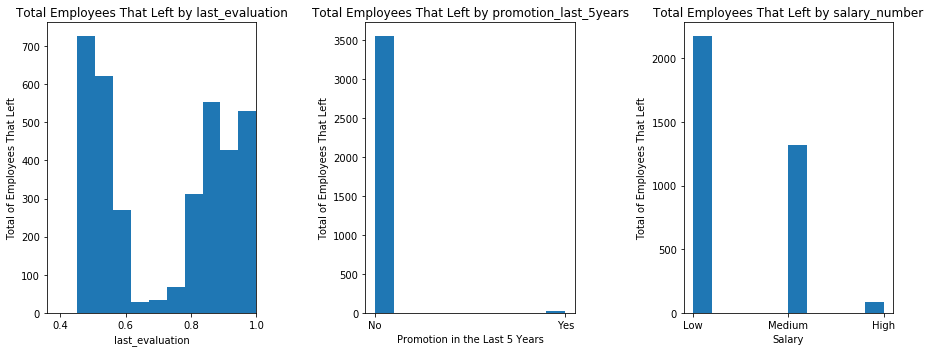

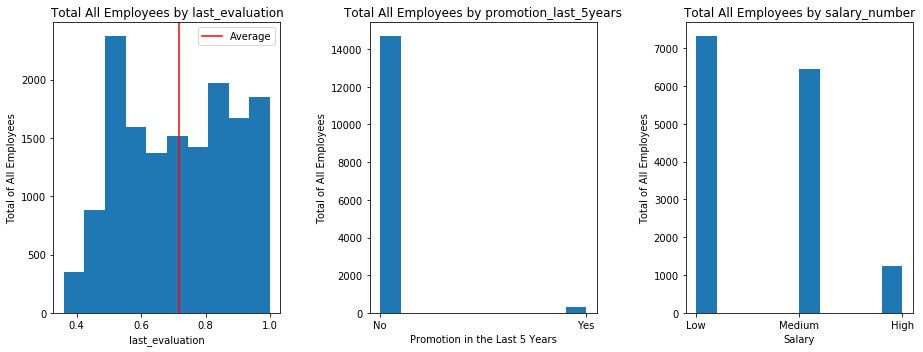

In [136]:
# Draw histograms to find leaver correlations with other factors
data_vis2(hr_df, left_df)

## Why are they leaving?
### Are there trends to employees leaving?
Here we try to find patterns between whether an employee left and other information about the employee.

Satisfaction Groups (top row):
  * There is a group of employees with a group with few projects (2) that were slightly satisfied, a group with a medium amount of projects with high satisfaction (4 or 5), and a group with the most projects (5-7) that are very unsatisfied.
  * There are three groups, which structure seems to correlate with previous plot (number of projects), with a group with the least hours worked per month with slight satisfaction (100-175 hours), another with high satisfation and many hours (225-275 hours), and another with very low satisfaction and the most hours (290-310 hours).
  * There are three groups, where employees with 3 years at the company are slightly satisfied, 4-5 years that are unsatisfied, and 5 to 6 years that are very satisfied. 
  * There are three groups, where employees with low evaluation are slightly satisfied (0.4-0.6 evaluation scores), with high evaluation and lowest satisfaction (0.78-0.98 evaluation scores), and a group with the highest satisfaction and evaluation scores (0.8-1.0 evaluation scores). 

Evaluation (bottom row):
  * There are three groups, one with 2 projects and low evaluation scores, another with 4 or 5 projects with the highest evaluation scores, and a third with 6 to 7 projects, and high evaluation scores.
  * There are three groups, which structure seems to correlate with previous plot (number of projects), with a group with the least hours worked per month with slight satisfaction (100-175 hours), another with high satisfation and many hours (225-275 hours), and another with very low satisfaction and the most hours (290-310 hours).
  * There are three groups, where employees with 3 years at the company have very low evaluations, 4-5 years that have very high evaluation score, and 5 to 6 years that also have high evaluation scores, if not a little higher. 
  
In each case of metrics for workload, there seems to be three groups, intuitively:
  * <strong>The sweet spot</strong>: it seems these groups have a sweet spot where satisfaction and evaluation scores are highest near the highest workload, but below the highest.
  * <strong>The overworked</strong>: A group with high evaluation scores, but are very unsatisfied that have the highest workload
  * <strong>The low performers</strong>: A group with the lowest evaluation scores, slightly satisfied, and lowest workload.
  
These groups don't seem to follow any sort of distribution pattern like linear or geometic.

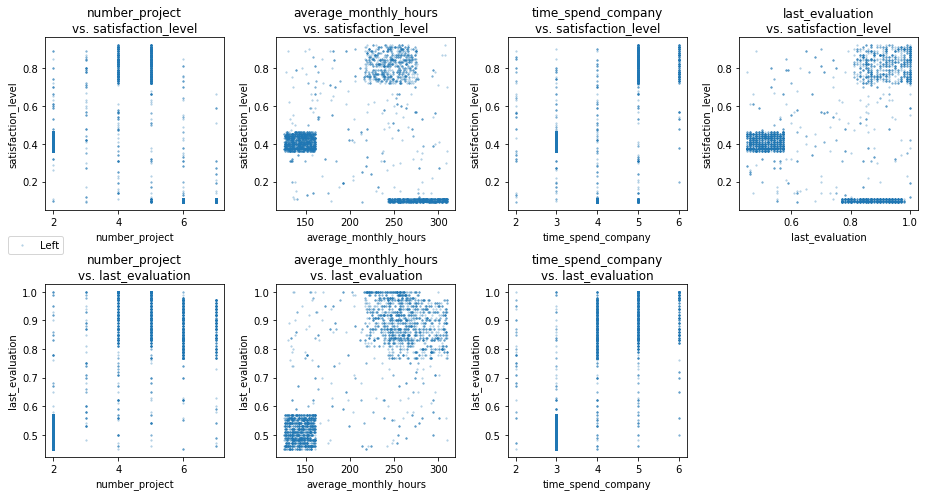

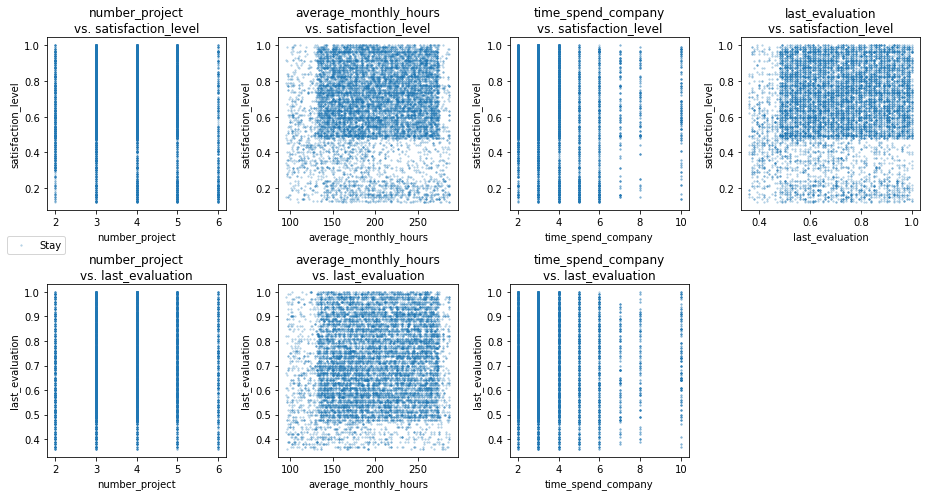

In [137]:
# Plot scatter plots to find meaningful correlations
data_vis3(stay_df, left_df)

## Conclusions and problems
The clusters in the scatter plots seemed to be grouped based on three types, and so performing a clustering algorithm between multiple variables would be interesting to do on this data. Obviously, being simulated, this data set is too perfect and the clusters too obvious, but visualizing these contrived clusters helps me see the power of clustering. These correlations don't seem to be linearly related, in some cases, so clustering seems  a better approach.

If an employee fits into one of these three categories based on evaluation score, satisfaction level, and the three workload metrics (number of projects, average monthly hours, and time spent at company), then they are more likely to leave, as the groups of employees that stay are larger, more general, and include different data ranges than these three groups.

The <strong>low performers</strong> group seems to have a characteristics that are most disjoint from groups in the employees that stay and so would indicate a much higher likelihood that they would leave.

### Missing data
 *  We do not know what exactly what the variable "left" means, whether this includes being laid off or fired
 *  We do not know if a promotion in the last 5 years refers to the last 5 years of the employee's career at the company or 5 years from the date that this data was generated
 * We do not know the time range of this data or when the employees left. It would be interesting to see if many employees left at the same time.
 * It would be interesting to see what teams or managers employees had and finding if it was related to an employee's likelihood to have left.
 * Factors about the company like stock value, profits, total size, benefits, etc. would be interesting to correlate to whether employees left or not

## Further research and solutions
I would like to see if the employees leaving was due to some categorical reason, such as primarily from a single department (or manager or team), having a work accident or not. It would also be interesting to find correlations between variables that are correlated to whether and employee left or not.

Obviously, getting the missing data aforementioned would be useful. It would be nice to work on real-world data int he future as well. Also learning the statistical difference between causation and correlation would be nice in determining patterns in the data.

Calculating Baysian probabilities for these three groups would be interesting and likely reveal more concrete statistics!